In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DATA = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = DATA.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print("training data shape: ", X_train.shape)
print("training labels shape: ", Y_train.shape)
print("testing data shape: ", X_test.shape)
print("testing labels: ", Y_test.shape) 

training data shape:  (60000, 28, 28)
training labels shape:  (60000,)
testing data shape:  (10000, 28, 28)
testing labels:  (10000,)


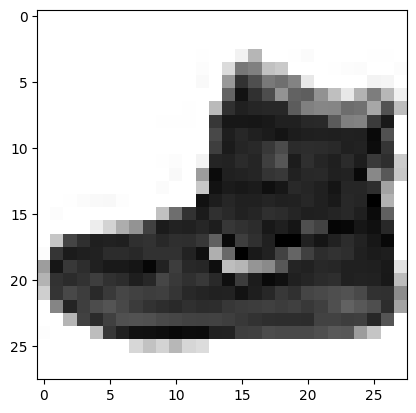

In [5]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [6]:
X_train = X_train / 255.0

X_test = X_test / 255.0

## MODEL CREATION

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
        ])

In [8]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.5012 - accuracy: 0.8232
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3760 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3394 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3130 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2963 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2800 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2688 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2574 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2494 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8768


In [11]:
print("model accuracy: ", test_acc*100)
print("loss: ", test_loss)

model accuracy:  87.6800000667572
loss:  0.3504893183708191


In [12]:
model_probab = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [13]:
predictions = model_probab.predict(X_test)

313/313 [==============================] - 1s 2ms/step


## Testing & Plotting

In [14]:
def plot_image(i, prediction_array, result, img):
    result , img = result[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_result = np.argmax(prediction_array)
    if predicted_result == result:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_result],
                                100*np.max(prediction_array),
                                class_names[result]),
                                color=color)

def plot_accuracy_graph(i, prediction_array, result):
    result = result[i]
    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim(0, 1)
    plot = plt.bar(range(10), prediction_array, color="#777777")
    predicted_result = np.argmax(prediction_array)

    plot[predicted_result].set_color('red')
    plot[result].set_color('blue')
    

## CORRECT PREDICTIONS

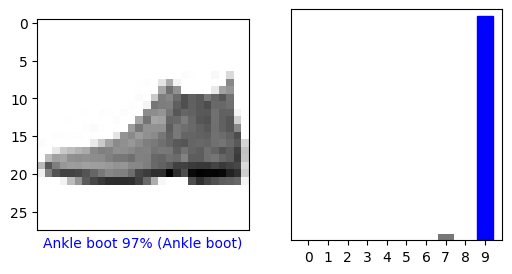

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_accuracy_graph(i, predictions[i], Y_test)


## WRONG PREDICTIONS

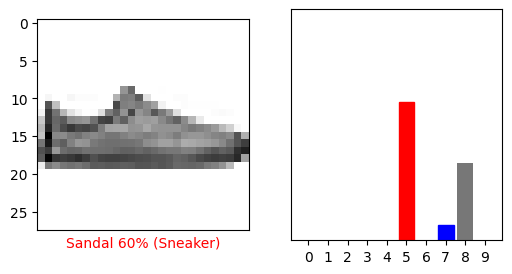

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_accuracy_graph(i, predictions[i], Y_test)

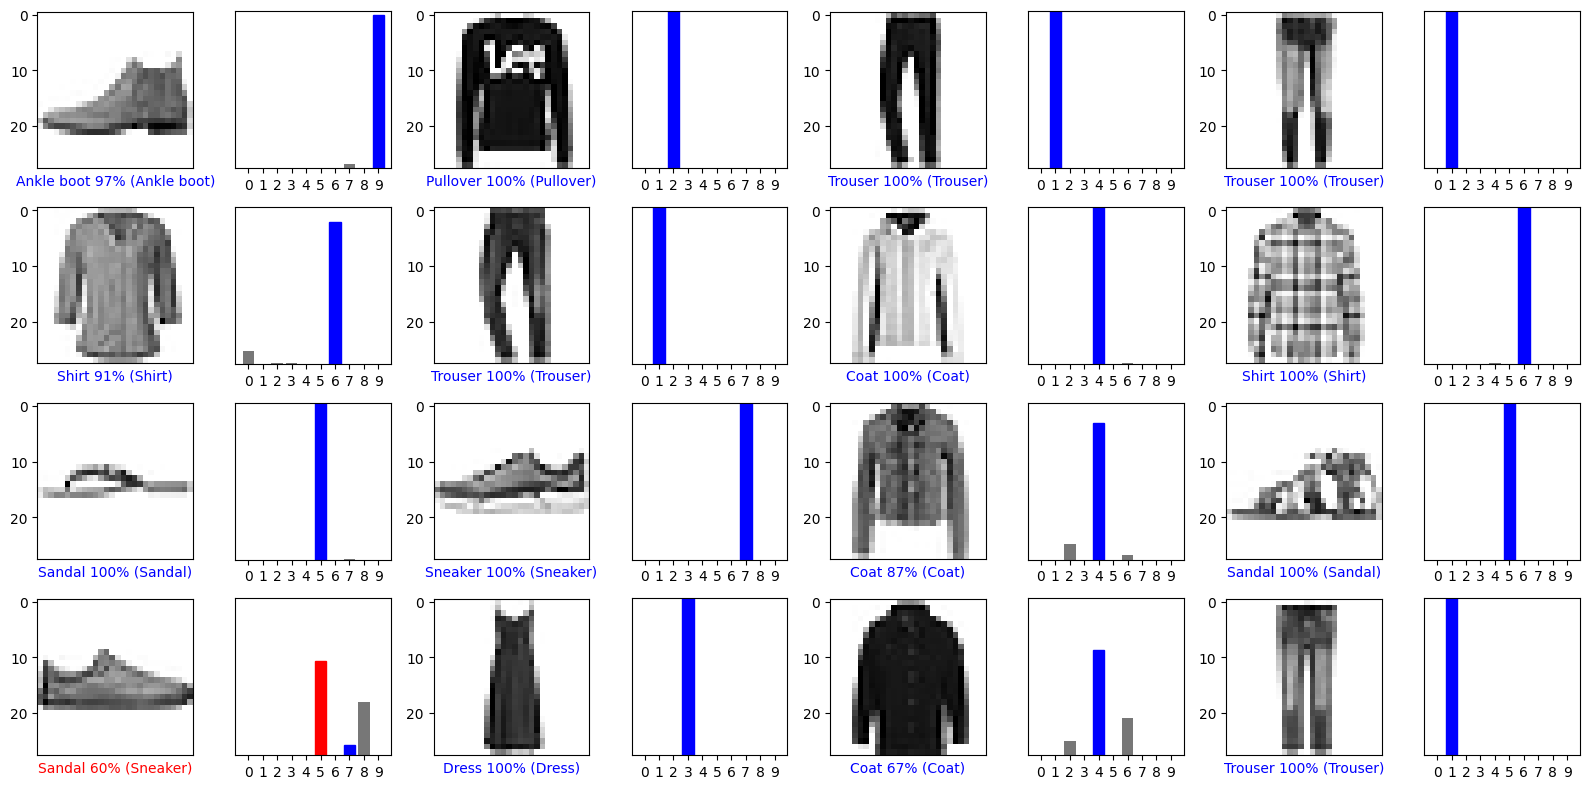

In [17]:
rows = 4
columns = 4
num_img = rows*columns
plt.figure(figsize=(2*2*columns, 2*rows))
for i in range(num_img):
    plt.subplot(rows, 2*columns, 2*i+1)
    plot_image(i, predictions[i], Y_test, X_test)
    plt.subplot(rows, 2*columns, 2*i+2)
    plot_accuracy_graph(i, predictions[i], Y_test)
plt.tight_layout()
plt.show()

## RUN Below code to test on a random image

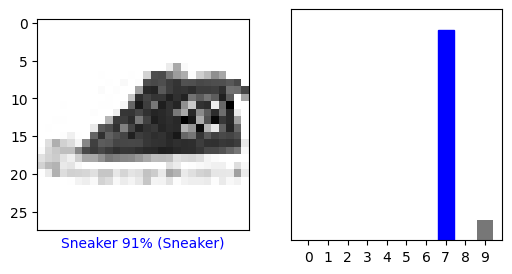

In [19]:
i = np.random.randint(1, 10000)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_accuracy_graph(i, predictions[i], Y_test)

* Notebook author - Goutam Munda
* for more information visit- https://www.tensorflow.org/tutorials/keras/classification#use_the_trained_model